In [13]:
%pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de Estilo Visual
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Carregar o CSV (assumindo que o arquivo está na mesma pasta)
df = pd.read_csv('imdb_top_1000.csv')

df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'])

# Remover linhas onde 'Gross' ou 'Meta_score' estão vazios para não quebrar os gráficos
df_limpo = df.dropna(subset=['Gross', 'Meta_score'])

print("Dados do IMDB carregados e limpos!")
print(f"Filmes restantes após limpeza: {len(df_limpo)}")
print("Exemplo da coluna Gross corrigida:", df_limpo['Gross'].head(1).values)

Dados do IMDB carregados e limpos!
Filmes restantes após limpeza: 750
Exemplo da coluna Gross corrigida: [28341469.]


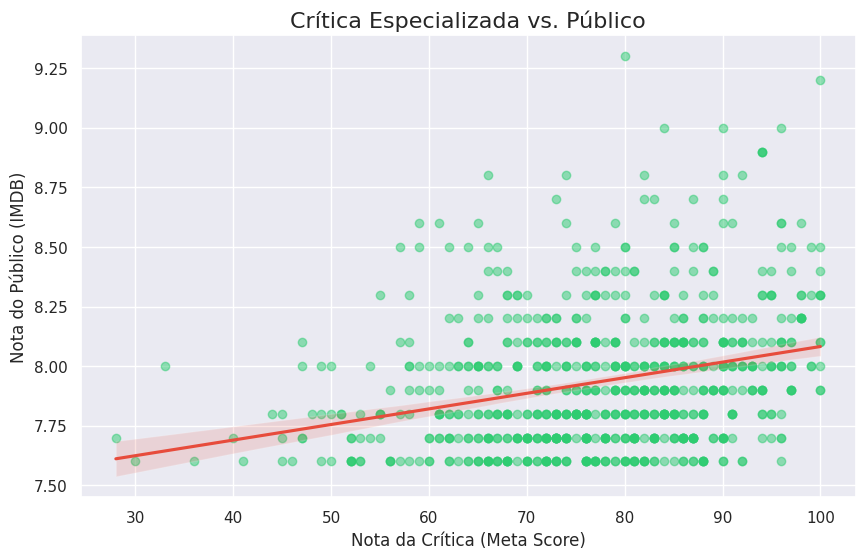

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot com linha de regressão
sns.regplot(data=df_limpo, x='Meta_score', y='IMDB_Rating',
            scatter_kws={'alpha':0.5, 'color': '#2ecc71'}, # Pontos verdes transparentes
            line_kws={'color': '#e74c3c'})

plt.title('Crítica Especializada vs. Público', fontsize=16)
plt.xlabel('Nota da Crítica (Meta Score)', fontsize=12)
plt.ylabel('Nota do Público (IMDB)', fontsize=12)
plt.show()

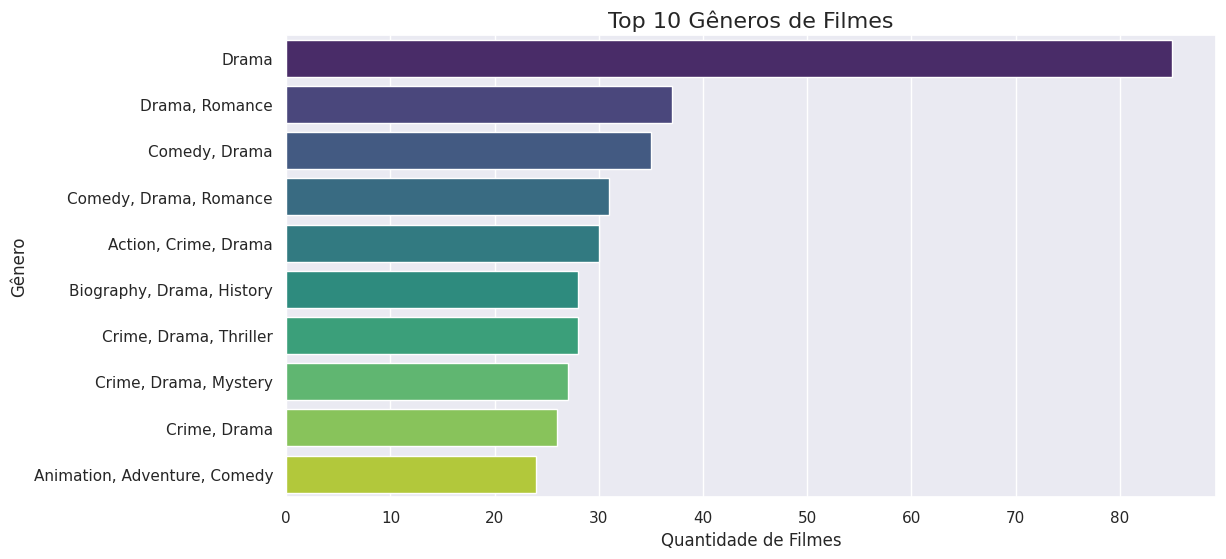

In [16]:
# Contagem dos gêneros
top_generos = df['Genre'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_generos.index, x=top_generos.values, palette="viridis", hue=top_generos.index)

plt.title('Top 10 Gêneros de Filmes', fontsize=16)
plt.xlabel('Quantidade de Filmes', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.show()

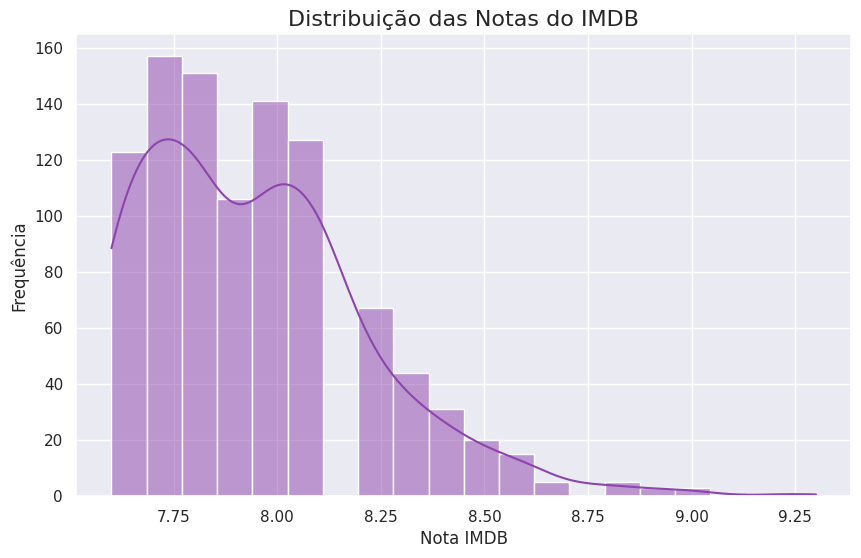

In [17]:
plt.figure(figsize=(10, 6))

# Histograma com linha de densidade (KDE)
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='#8e44ad')

plt.title('Distribuição das Notas do IMDB', fontsize=16)
plt.xlabel('Nota IMDB', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()